## Named Entity Recognition: Identifying Entities in Text

Dveloping and optimizing a Named Entity Recognition (NER) pipeline for identifying and classifying entities in text data. I utilized both **traditional NLP approaches** and **Deep Learning techniques** for comparison and performance analysis.



---
## Setup

---

**Import needed dependencies**

In [7]:
import os
import sys
# import random
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

**Change Current Working Directory**

In [8]:
# Get the current working directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# Change the working directory to a specific path
os.chdir('/mnt/d/ai/WideBotAI')

# Verify the change
current_dir = os.getcwd()
print(f"New working directory: {current_dir}")

if not 'WideBotAI' in sys.path:
    sys.path += ['WideBotAI']

Current working directory: /mnt/d/ai/WideBotAI
New working directory: /mnt/d/ai/WideBotAI


**Allocate color palette**

In [9]:
plt.style.use('seaborn-white')
%matplotlib inline

---
## Import Dataset
---

**Download dataset from kaggle**

Authontcation to access kaggle 

- username:"hebamo7amed"
- key:"dc5470313c833c4962ebace8898816fa"

In [10]:
import opendatasets as od

# Check if the data directory exists
data_dir = './data/ner_dataset.csv'

if os.path.exists(data_dir):
    print("Dataset already exists in the specified directory.")
else:
    # Download the dataset if it doesn't exist
    print("Dataset not found. Downloading...")
    od.download("https://www.kaggle.com/namanj27/ner-dataset")
    print("Dataset downloaded successfully.")

    os.rename('./ner-dataset/ner_datasetreference.csv', os.path.join(data_dir))
    print(f"The dataset has been moved to {data_dir}...")


Dataset already exists in the specified directory.


In [11]:
df = pd.read_csv(data_dir, encoding="latin1")
df[df['Tag'] != 'O']

,Sentence #,Word,POS,Tag
6,NaN,London,NNP,B-geo
12,NaN,Iraq,NNP,B-geo
18,NaN,British,JJ,B-gpe
42,NaN,Bush,NNP,B-per
65,NaN,Hyde,NNP,B-geo
...,...,...,...,...
1048508,NaN,Pakistani,JJ,B-gpe
1048518,NaN,Punjab,NNP,B-geo
1048521,Sentence: 47956,Indian,JJ,B-gpe
1048529,NaN,Saturday,NNP,B-tim


#### Fill NULLs 

Replaces missing values (NaNs) by **forward-filling**. 

In [12]:
df = df.fillna(method='ffill')

### Normalize words

In [7]:
df['Word'] = [w.lower() for w in df['Word']]

## Text Mining

In [8]:
words = list(set(df['Word'].values))
print("Unique Words in corpus:",df['Word'].nunique())

Unique Words in corpus: 31817


In [9]:
tags = list(set(df['Tag'].values))
print("Unique Tag in corpus:",df['Tag'].nunique())
print(tags)

Unique Tag in corpus: 17
['B-art', 'B-geo', 'B-tim', 'I-nat', 'I-org', 'B-nat', 'B-per', 'O', 'I-art', 'I-eve', 'B-gpe', 'B-eve', 'I-geo', 'I-per', 'I-gpe', 'I-tim', 'B-org']


In [10]:
word_frequencies = {}

# 2. Iterate through the 'Word' column
for word in df['Word']:
    if word in word_frequencies:
        word_frequencies[word] += 1
    else:
        word_frequencies[word] = 1

word_frequencies

{'thousands': 495,
 'of': 26378,
 'demonstrators': 132,
 'have': 5486,
 'marched': 65,
 'through': 518,
 'london': 261,
 'to': 23249,
 'protest': 238,
 'the': 63905,
 'war': 903,
 'in': 28050,
 'iraq': 1738,
 'and': 20116,
 'demand': 221,
 'withdrawal': 154,
 'british': 637,
 'troops': 1202,
 'from': 4557,
 'that': 6437,
 'country': 1934,
 '.': 47771,
 'families': 110,
 'soldiers': 768,
 'killed': 2861,
 'conflict': 245,
 'joined': 116,
 'protesters': 217,
 'who': 1981,
 'carried': 222,
 'banners': 11,
 'with': 5448,
 'such': 423,
 'slogans': 36,
 'as': 4224,
 '"': 3686,
 'bush': 977,
 'number': 463,
 'one': 1692,
 'terrorist': 356,
 'stop': 294,
 'bombings': 243,
 'they': 2397,
 'houses': 57,
 'parliament': 505,
 'a': 22696,
 'rally': 109,
 'hyde': 2,
 'park': 29,
 'police': 1866,
 'put': 183,
 'marchers': 7,
 'at': 4692,
 '10,000': 56,
 'while': 627,
 'organizers': 40,
 'claimed': 282,
 'it': 3823,
 'was': 4881,
 '1,00,000': 36,
 'comes': 234,
 'on': 7113,
 'eve': 53,
 'annual': 138,

In [11]:
InteractiveShell.ast_node_interactivity = "last_expr"

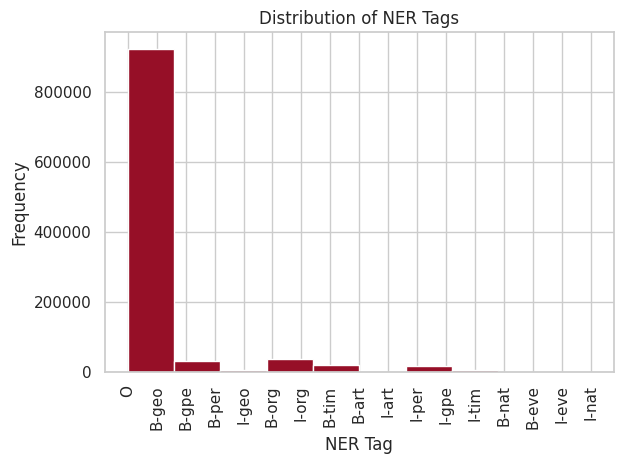

In [12]:
InteractiveShell.ast_node_interactivity = "last_expr"

df["Tag"].hist()
plt.title("Distribution of NER Tags")
plt.xlabel("NER Tag")
plt.ylabel("Frequency")

plt.xticks(rotation=90)  # Rotate labels vertically
plt.tight_layout()  
plt.show()

---
## Baseline Experiments
---

1. **Text Representation:** Text Representation using word-to-vec mapping.
   - Load the pre-trained GloVe embeddings (`glove-twitter-25`) using gensim.downloader.
   - Create a function `get_vector` to handle OOV words by generating random vectors.
   - Apply this function to the `Word` column to create the `WordVector` column.

2. **Data Splitting:**
   - Split the data into training and testing sets (80% for training, 20% for testing).

3. **Model Training:**
   - A Logistic Regression model is used.
   - Train the model on the vectorized training data.

4. **Model Evaluation:**
   - Calculate the accuracy of each model on the test (evaluation) data.
   - Plot the confusion matrices using Seaborn to visualize the model's predictions.
   - Print classification reports to get detailed performance metrics for each tag class.

5. **Make Prediction:** Make predictions on a new unseen words using the trained models.

### 1. Text Representation using word-to-index mapping

In [14]:
import gensim.downloader as api
from gensim.models import KeyedVectors

if os.path.exists("glove-twitter-25"):
    glove_vectors = KeyedVectors.load("glove-twitter-25")
else:
    glove_vectors = api.load("glove-twitter-25")
    glove_vectors.save('glove-twitter-25')

In [15]:
def get_vector(word):
    try:
        return glove_vectors.get_vector(word)
    except KeyError: # Create a random vector for OOV words.
        return np.random.rand(25)  # Generate a random 25-dimensional vector

In [16]:
df["WordVector"] = [get_vector(w) for w in df["Word"]]

for i in range(25):
    df[f"Vector_{i+1}"] = df["WordVector"].apply(lambda x: x[i])

### 2. Data Splitting

In [17]:
X = df.drop(['Sentence #', 'Word', 'POS', 'Tag', 'WordVector'], axis=1).to_numpy()
y = df["Tag"].to_numpy()

In [13]:
import gc

gc.collect()

8

In [19]:
del df

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (838860, 25)
y_train shape: (838860,)
X_test shape: (209715, 25)
y_test shape: (209715,)


### 3. Model Training

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import time

# 4.1 Logistic Regression Model
start_time = time.time()
model_lr = OneVsRestClassifier(LogisticRegression())
# LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_lr.fit(X_train, y_train)
end_time = time.time()
print(f"Logistic Regression training time: {end_time - start_time:.2f} seconds")

Logistic Regression training time: 35.00 seconds


### 4. Model Evaluation


In [22]:
import utils

y_pred = model_lr.predict(X_test)
nb_results = utils.evaluate_classifier(y_test, y_pred, classes=tags)
nb_results

{'accuracy': 0.8841141549245405,
 'precision': 0.8448039694845872,
 'recall': 0.8841141549245405,
 'f1_score': 0.8554265420555985,
 'classification_report': '              precision    recall  f1-score   support\n\n       B-art       1.00      0.00      0.00        77\n       B-geo       0.55      0.45      0.50      7497\n       B-tim       0.84      0.43      0.57      4037\n       I-nat       1.00      0.00      0.00        11\n       I-org       0.15      0.01      0.01      3201\n       B-nat       0.00      0.00      0.00        38\n       B-per       0.51      0.30      0.38      3354\n           O       0.91      0.99      0.94    177736\n       I-art       1.00      0.00      0.00        75\n       I-eve       1.00      0.00      0.00        53\n       B-gpe       0.79      0.69      0.73      3186\n       B-eve       1.00      0.00      0.00        60\n       I-geo       0.38      0.00      0.00      1430\n       I-per       0.56      0.41      0.47      3468\n       I-gpe   

In [23]:
print(nb_results['classification_report'])

              precision    recall  f1-score   support

       B-art       1.00      0.00      0.00        77
       B-geo       0.55      0.45      0.50      7497
       B-tim       0.84      0.43      0.57      4037
       I-nat       1.00      0.00      0.00        11
       I-org       0.15      0.01      0.01      3201
       B-nat       0.00      0.00      0.00        38
       B-per       0.51      0.30      0.38      3354
           O       0.91      0.99      0.94    177736
       I-art       1.00      0.00      0.00        75
       I-eve       1.00      0.00      0.00        53
       B-gpe       0.79      0.69      0.73      3186
       B-eve       1.00      0.00      0.00        60
       I-geo       0.38      0.00      0.00      1430
       I-per       0.56      0.41      0.47      3468
       I-gpe       1.00      0.00      0.00        42
       I-tim       0.00      0.00      0.00      1374
       B-org       0.28      0.02      0.03      4076

    accuracy              

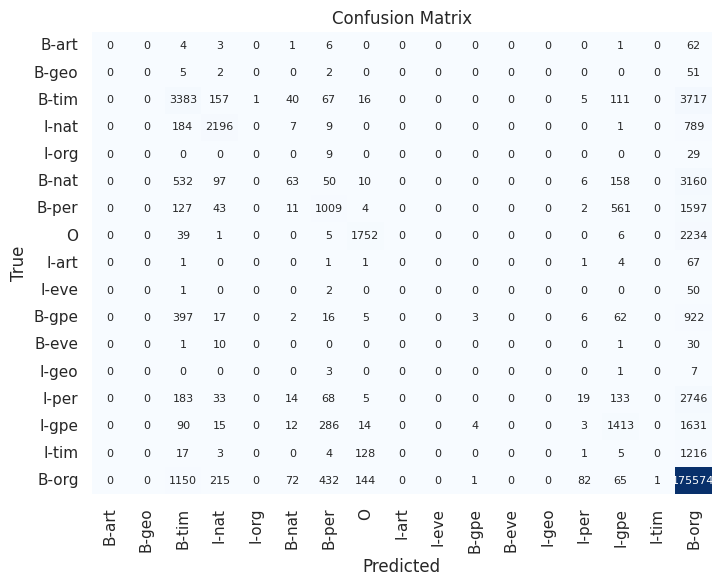

In [24]:
utils.plot_confusion_matrix(y_test, y_pred, classes=tags)

In [25]:
del X, y, X_train, X_test, y_train, y_test

### 5. Make Prediction

In [68]:
sample_text = "This is Heba and I am doing a demo of the trained NER model using PyTorch through VS Code from Microsoft."
sample_words = sample_text.split()
sample_words

['This',
 'is',
 'Heba',
 'and',
 'I',
 'am',
 'doing',
 'a',
 'demo',
 'of',
 'the',
 'trained',
 'NER',
 'model',
 'using',
 'PyTorch',
 'through',
 'VS',
 'Code',
 'from',
 'Microsoft.']

In [54]:
preds = []

for w in sample_words:
    vector = get_vector(w)
    pred = model_lr.predict([vector])[0]
    preds.append(pred) 
preds

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']

---
## Advanced Experiments
---

**LSTMs** are a powerful type of RNN particularly well-suited for tasks involving sequential data like text. It captures long-range dependencies within sequences, allowing the model to understand how words relate to each other across longer distances in a sentence. This capability is crucial for NER, where the context of surrounding words often determines the type of named entity being referred to.

1. **Data Preparation:** Preprocess the text data, including tokenization, padding, and encoding words and tags.
    -  Define a custom dataset class to load and prepare your data. It should inherit from `torch.utils.data.Dataset` and implement `__len__` and `__getitem__` methods.
    -  Create a DataLoader to handle batching and shuffling of data.

2. **Model Architecture:** Define the NER model architecture using LSTMs and configure the hyperparameters like the number of LSTM units and embedding dimensionality.
    - Create a class `LSTMModel` that inherits from `nn.Module`. Define the layers (LSTM and fully connected) and the forward pass logic.
    - Set the device (`device`) to "cuda" for GPU usage if available or "cpu" otherwise.
    - Define hyperparameters like input size, hidden size, number of layers, learning rate, batch size, and number of epochs.
    - Create an instance of your `LSTMModel` and move it to the device.
    - Choose an appropriate loss function (e.g., `nn.CrossEntropyLoss` for classification) and an optimizer (e.g., `optim.Adam`).

3. **Model Training and Evaluation:** Train the model on the prepared data, monitoring the performance through loss and accuracy metrics.
    - Iterate through epochs and batches.
    - Perform forward and backward passes.
    - Calculate the loss.
    - Update model weights using the optimizer.
    - Save the trained model's state dictionary using `torch.save`.
4. **Make Prediction:**
    - Load the saved model state dictionary for inference.
    - Use the loaded model to make predictions on new unseen data.

In [69]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

In [70]:
df = pd.read_csv(data_dir, encoding="latin1")
df = df.fillna(method='ffill')
df.head(5)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


### 1. Data Preparation

In [71]:
class NERDataset(Dataset):

    def __init__(self, df):
        
        # Create a list of unique words and tags
        self.vocabs = list(set(df["Word"].values))
        self.tags = list(set(df["Tag"].values))
        
        # Create dictionaries for mapping words and tags to integers
        self.word2idx = {w: i+1 for i, w in enumerate(self.vocabs)}
        self.tag2idx = {t: i for i, t in enumerate(self.tags)}

        self.sentences, self.tokens, self.tags = self.word2sent(df)

    def __len__(self):
        return len(self.sentences)
    
    def __getitem__(self, idx):
        sentence = self.sentences[idx]
        tags = self.tags[idx][:]
        tokens = self.tokens[idx][:]

        ids = [self.word2idx[token] for token in tokens]
        tags_ids = [self.tag2idx[tag] for tag in tags]

        return {
            'sentences':sentence,
            'tokens': tokens,
            'tags': tags,
            'ids': torch.tensor(ids),
            'tags_ids': torch.tensor(tags_ids),
        }

    def word2sent(self, df):
        sentences  = []
        tokens = []
        tags = []
        groups = df.groupby('Sentence #')

        for i, group in groups:
            words_ = group["Word"].tolist()
            tags_ = group["Tag"].tolist()
            sentences.append(" ".join(words_))
            tokens.append(words_)
            tags.append(tags_)

        return sentences, tokens, tags

In [93]:
dataset = NERDataset(df)
dataset[0]

{'sentences': 'Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .',
 'tokens': ['Thousands',
  'of',
  'demonstrators',
  'have',
  'marched',
  'through',
  'London',
  'to',
  'protest',
  'the',
  'war',
  'in',
  'Iraq',
  'and',
  'demand',
  'the',
  'withdrawal',
  'of',
  'British',
  'troops',
  'from',
  'that',
  'country',
  '.'],
 'tags': ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-geo',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-geo',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-gpe',
  'O',
  'O',
  'O',
  'O',
  'O'],
 'ids': tensor([10790, 14375, 17904, 16071, 14778, 24777, 12985, 28104, 15776, 17939,
           446,  9415, 35039, 29461, 19573, 17939, 26144, 14375, 29778, 26800,
          6222,  3732, 16567,  1575]),
 'tags_ids': tensor([ 4,  4,  4,  4,  4,  4, 12,  4,  4,  4,  4,  4, 12,  4,  4,  4,  4,  4,
          7,  4,  4,  4,  4,  4])}

In [94]:
from torch.utils.data import random_split

# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

### 2. Model Architecture

In [95]:
class NERModel(nn.Module):

    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.lstm(embedded)
        output = self.fc(output)
        return output

In [96]:
EMBEDDING_DIM = 32
HIDDEN_DIM = 64
LEARNING_RATE = 0.1
EPOCHS = 10

model_lstm = NERModel(len(dataset.vocabs) + 1, EMBEDDING_DIM, HIDDEN_DIM, len(dataset.tags))

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_lstm.parameters(), lr=LEARNING_RATE)

### 3. Model Training and Evalution

In [97]:
def collate_fn(batch):
    x = [item['ids'] for item in batch]
    y = [item['tags_ids'] for item in batch]
    x_lengths = [len(seq) for seq in x]
    y_lengths = [len(seq) for seq in y]
    
    # Pad the sequences to the same length
    x = nn.utils.rnn.pad_sequence(x, batch_first=True)
    y = nn.utils.rnn.pad_sequence(y, batch_first=True)
    
    # Create a mask to ignore padding values in the loss calculation
    x_mask = torch.arange(x.size(1))[None, :] < torch.tensor(x_lengths)[:, None]
    y_mask = torch.arange(y.size(1))[None, :] < torch.tensor(y_lengths)[:, None]
    
    return x, y, x_mask, y_mask

In [98]:
BATCH_SIZE = 8

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True,collate_fn = collate_fn)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False,collate_fn = collate_fn)

In [99]:
%%time 
best_val_loss = float('inf')  
patience = 5  
epochs_without_improvement = 0

for epoch in range(EPOCHS):
    
    train_loss = 0.0
    test_loss = 0.0
    model_lstm.train()

    for batch in train_loader:
        x, y, x_mask, y_mask = batch
        optimizer.zero_grad()
        output = model_lstm(x)
        loss = criterion(output.view(-1, len(dataset.tags)), y.view(-1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * x.size(0)
        
    train_loss /= len(train_dataset)
    model_lstm.eval()
    with torch.no_grad():
        for batch in test_loader:
            x, y, x_mask, y_mask = batch
            output = model_lstm(x)
            loss = criterion(output.view(-1, len(dataset.tags)), y.view(-1))
            test_loss += loss.item() * x.size(0)
        test_loss /= len(test_dataset)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {test_loss:.4f}")

    # Save the model if validation loss improves
    if test_loss < best_val_loss:
        best_val_loss = test_loss
        torch.save(model_lstm.state_dict(), "NER_model.pth")  # Save the model weights
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1

    
    # Early stopping
    if epochs_without_improvement >= patience:
        print("Early stopping at epoch:", epoch+1)
        break

Epoch 1, Train Loss: 0.2508, Val Loss: 0.2394
Epoch 2, Train Loss: 0.2416, Val Loss: 0.2370
Epoch 3, Train Loss: 0.2337, Val Loss: 0.2322
Epoch 4, Train Loss: 0.2268, Val Loss: 0.2373
Epoch 5, Train Loss: 0.2276, Val Loss: 0.2298
Epoch 6, Train Loss: 0.2198, Val Loss: 0.2262
Epoch 7, Train Loss: 0.2172, Val Loss: 0.2156
Epoch 8, Train Loss: 0.2139, Val Loss: 0.2076
Epoch 9, Train Loss: 0.2118, Val Loss: 0.2136
Epoch 10, Train Loss: 0.2088, Val Loss: 0.2092
CPU times: user 11h 46min 22s, sys: 2h 30min 13s, total: 14h 16min 35s
Wall time: 8h 21min 52s


In [101]:
torch.save(model_lstm.state_dict(), "NER_model.pth")

### 4. Make Prediction

In [100]:
text = "This is Heba and I am doing a demo of the trained NER model using PyTorch through VS Code from Microsoft."

# Split the text into words
words = text.split()

# Convert words to numerical values using the word2idx dictionary
x = [dataset.word2idx.get(word, 0) for word in words]

# Convert the numerical values to a tensor and add a batch dimension
x = torch.tensor(x).unsqueeze(0)

# Pass the tensor through the model to get the predicted tags
model_lstm.eval()
with torch.no_grad():
    output = model_lstm(x)
    _, predicted_tags = torch.max(output, dim=2)

# Convert the predicted tags back to their corresponding tag labels using the idx2tag dictionary
predicted_tags = predicted_tags.squeeze().tolist()
predicted_labels = [dataset.tags[idx] for idx in predicted_tags]
predicted_labels[0]

NERModel(
  (embedding): Embedding(35178, 32)
  (lstm): LSTM(32, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=47959, bias=True)
)

['B-geo',
 'O',
 'O',
 'B-per',
 'I-per',
 'O',
 'B-tim',
 'O',
 'B-geo',
 'O',
 'B-gpe',
 'O',
 'B-gpe',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-geo',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O']